# Exercise 7: Magnetic resonance (I)

> *Type name(s) of participant(s):*

Necessary imports (run this block before any other code):

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Equilibrium magnetization

### Task 1.1
> Calculate the relative difference $\frac{\Delta n}{n}$ in up- and down-state spin population for the common case of:
>- Protons (1H)
>- Body temperature (310 K)
>- 3 T field strength  

*Type your answer in this cell:*  
$$\frac{n_{anti-parallel}}{n_{parallel}}=exp(-\frac{\Delta E}{kT})=exp(-\frac{\gamma hB_0}{2\pi kT})$$
$$\frac{\Delta n}{n}=\frac{\gamma hB_0}{4\pi kT}=\frac{267.54×10^6(HzT^{-1})×6.62607015×10^{-34}(J·s)×3T}{4\pi×1.38×10^{−23}(J/K)×310(K)}=9.898×10^{-6}$$

## Section 2: Magnetization dynamics

This section involves simulating and visualizing repeated on-resonance excitation of nuclear magnetization at one point. The prepared code below sets up the following tasks.

![img](Img.jpg)

In [9]:
M0 = 1                           # Equilibrium magnetization
T1 = 200                         # T1 [ms]
T2 = 50                          # T2 [ms]
angle = 60 * np.pi/180           # Flip angle [rad] 
TR = 50                          # Repetition time (time for relaxation between RF pulses) [ms]
npulse = 50                      # Number of repetitions (RF pulses and relaxation periods)
nt = 100                         # Number of time points per relaxation period between RF pulses

Mz = np.zeros([npulse,1])              # Store Mz before each RF pulse 
Mxy = np.zeros([npulse,1])             # Store Mxy after each RF pulse
Mz_all_reps = np.zeros([nt,npulse])    # Store time courses of Mz during relaxation after each RF pulse
Mxy_all_reps = np.zeros([nt,npulse])   # Store time courses of Mxy during relaxation after each RF pulse

# Vector of time values covering one inter-pulse interval
t = np.multiply(range(0,nt),TR)
t = np.divide(t,nt-1)

# Set initial conditions of magnetization vector
Mz_before_pulse = M0
Mxy_before_pulse = 0

### Task 2.1
> Please complete the following steps where indicated in the code below:
> 1. Perform equal excitations by given flip angle $\theta$ at a given repetition time $T_R$.   
>     - Assume excitation to be an instantaneous rotation by $\theta$. Excitation is on-resonance, so all rotations are about the same axis.
>     - Note that both transverse and longitudinal components of magnetization undergo excitation.
> 2. Store magnetization time courses during relaxation.
> 3. Update available magnetization for subsequent cycles, considering that relaxation between excitations is incomplete.
> 4. Illustrate magnetization vs. time over successive cycles:
<br>(A) Showing only available magnetization for each cycle: M$_z$ before excitation and M$_{xy}$ after excitation
<br>(B) Including relaxation between RF pulses

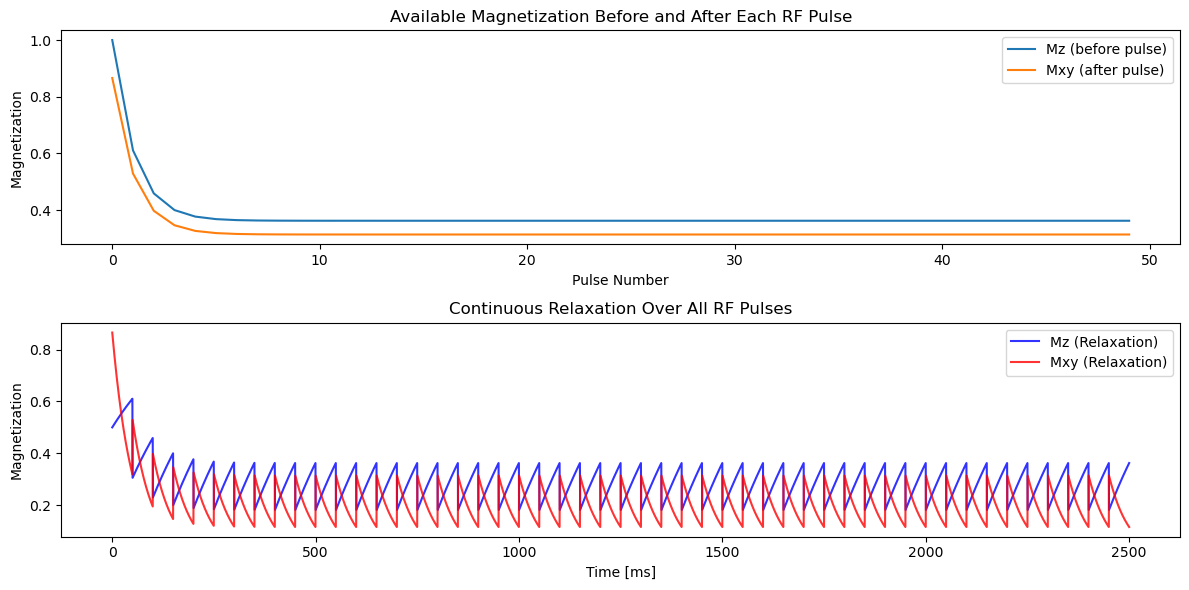

In [10]:
# Loop through RF pulses
for p in range(npulse):
    
    Mz[p] = Mz_before_pulse                                                           # Store Mz before RF pulse ("available magnetization")
    
    # TASK 2.1.1: Apply excitation by the flip angle to get magnetization after RF pulse
    Mz_after_pulse =Mz_before_pulse * np.cos(angle)
    Mxy_after_pulse =Mz_before_pulse * np.sin(angle)
    
    Mxy[p] = Mxy_after_pulse                                                          # Store Mxy after RF pulse ("transverse magnetization giving signal") 
    
    # TASK 2.1.2: Define time courses of Mz and Mxy during relaxation period p
    Mz_all_reps[:,p] = M0 + (Mz_after_pulse -M0) * (np.exp(-t / T1))
    Mxy_all_reps[:,p] =Mxy[p]* np.exp(-t / T2)   
    
    # TASK 2.1.3: Update available magnetization for next excitation + relaxation cycle
    Mz_before_pulse =Mz_all_reps[-1, p]
    Mxy_before_pulse =Mxy_all_reps[-1, p]

# TASK 2.1.4: Illustrate Mz and Mxy vs. time over successive cycles
# Just plot the following sets of arrays: Mxy and Mz, and then the all_reps variants
# (A) Showing only available magnetization for each cycle
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(Mz, label='Mz (before pulse)')
plt.plot(Mxy, label='Mxy (after pulse)')
plt.title("Available Magnetization Before and After Each RF Pulse")
plt.xlabel("Pulse Number")
plt.ylabel("Magnetization")
plt.ylim(0, 1)
plt.legend()
# (B) Including relaxation between RF pulses
t_continuous = np.linspace(0, TR*npulse, nt*npulse)
Mz_continuous = np.zeros(nt*npulse)
Mxy_continuous = np.zeros(nt*npulse)

for p in range(npulse):
    start_idx = p * nt
    end_idx = (p + 1) * nt
    Mz_continuous[start_idx:end_idx] = Mz_all_reps[:,p]
    Mxy_continuous[start_idx:end_idx] = Mxy_all_reps[:,p]
plt.subplot(2, 1, 2)
plt.plot(t_continuous, Mz_continuous, color='blue', alpha=0.8, label='Mz (Relaxation)')
plt.plot(t_continuous, Mxy_continuous, color='red', alpha=0.8, label='Mxy (Relaxation)')
plt.title("Continuous Relaxation Over All RF Pulses")
plt.xlabel("Time [ms]")
plt.ylabel("Magnetization")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

### Task 2.2
> Vary $T_1$, $T_2$, and the flip angle. Study the magnetization behaviour. What happens in the course of long pulse series?  

*Type your answer in this cell:*  When increasing T1, longitudinal magnetization(Mz) curve recovers faster.If increasing T2 ,longitudinal magnetization(Mz) curve donesn't change and transverse magnetization(Mxy) recovers more slowly .In the course of long pulse ，magnetization reach a steady state where the longitudinal magnetization reaches a value that balances out the effects of each RF pulse and its recovery.Flipping angle has no effect on Mxy.If angle is bigger ,Mz recovers faster.

### Task 2.3
> Repeated excitation leads to periodic magnetization dynamics. Assuming complete transverse relaxation per interval, which flip angle yields maximum transverse magnetization in the periodic regime? Calculate analytically for given $T_1$ and $T_R$.
<br>
><br>*Hint: In a steady state as described above, let $M_z^s$ denote z-magnetization prior to the next excitation pulse. Excitation with flip angle $\theta$ results in $M_z' = M_z^s \ cos(\theta)\,$, and subsequent relaxation during the pulse interval $T_R$ results in $M_z'' = M_0 + (M_z' - M_0) \ e^{-\frac{T_R}{T_1}}\,$, which must equal that prior to the preceding excitation pulse to obey the steady state assumption.*

*Type your answer in this cell:*
$$M_z'' = M_0+(M_Z^Scos\theta-M0)e^{-T_R/T_1}$$
$$M_z^S = M_0+(M_Z^Scos\theta-M0)e^{-T_R/T_1}$$
$$M_z^S = M_0 \frac{1-e^{-T_R/T_1}}{1-cos\theta e^{-T_R/T_1}}$$
$$M_{xy}=M_Z^Ssin\theta$$
$$\theta=arccos(e^{-T_R/T_1})=0.67772693rad$$

### Task 2.4
> Verify your solution to Task 2.3.
>
>*Hint: Using snippets of your code from Task 2.1 simulating repeated excitation and relaxation, determine the steady state transverse magnetization for a range of flip angles.*

0.6731984257692414


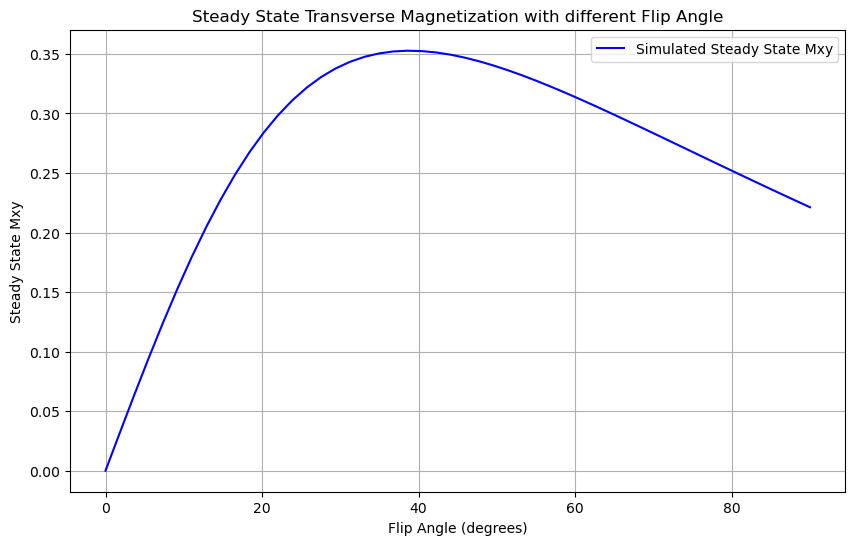

In [16]:
# Type your code in this cell:
angles = np.linspace(0, np.pi/2, 50)  # 0 to 90 degrees
steady_state_mxy = np.zeros_like(angles)

# For each flip angle
for i, angle in enumerate(angles):
    # Initialize arrays
    Mz = np.zeros(npulse)
    Mxy = np.zeros(npulse)
    Mz_all_reps = np.zeros((nt, npulse))
    Mxy_all_reps = np.zeros((nt, npulse))
    
    # Initial conditions
    Mz_before_pulse = M0
    
    # Loop through RF pulses
    for p in range(npulse):
        Mz[p] = Mz_before_pulse
        
        # Apply excitation
        Mz_after_pulse = Mz_before_pulse * np.cos(angle)
        Mxy_after_pulse = Mz_before_pulse * np.sin(angle)
        
        Mxy[p] = Mxy_after_pulse
        
        # Relaxation
        Mz_all_reps[:,p] = M0 + (Mz_after_pulse - M0) * np.exp(-t/T1)
        Mxy_all_reps[:,p] = Mxy[p] * np.exp(-t/T2)
        
        # Update for next cycle
        Mz_before_pulse = Mz_all_reps[-1, p]
        
    # Store steady state value (using last pulse)
    steady_state_mxy[i] = Mxy[-1]

max_idx = np.argmax(steady_state_mxy)
max_angle = angles[max_idx]
max_angle_degrees = np.degrees(max_angle)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.degrees(angles), steady_state_mxy, 'b-', label='Simulated Steady State Mxy')
plt.title('Steady State Transverse Magnetization with different Flip Angle')
plt.xlabel('Flip Angle (degrees)')
plt.ylabel('Steady State Mxy')
plt.grid(True)
plt.legend()
print(max_angle)


*Briefly explain your code in this cell:*